<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Simulacion_examen_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Presentacion de tarea a realizar**

Se tiene un conjunto de datos el cual busca predecir el peso de un pescado.

# Importacion de bibliotecas

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data CodingDojo/Fish.xlsx")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Analisis de datos con pandas

**Exploracion de dataframe**

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**busqueda de nulos**

Presentan nulos:

- Species
- Length1
- Length2
- Length3
- Height
- Width

In [ ]:
df.isna().sum()

Species    4
Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64

**Busqueda de duplicados**

- Sin duplicados

In [ ]:
df.duplicated().sum()

0

**Se puede apreciar incoherencia de columna categorica**

No existe pez llamado Beam, por lo que se corregira con el nombre mas cercano "Bream" y se asumira un error de typeo

In [ ]:
df["Species"].value_counts()

Perch        53
Bream        33
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Beam          2
Name: Species, dtype: int64

In [ ]:
df[df["Species"] == "Beam"]

,Species,Weight,Length1,Length2,Length3,Height,Width
19,Beam,650.0,31.0,33.5,38.7,14.4738,5.7276
25,Beam,725.0,31.8,35.0,40.9,16.3600,6.0532


In [ ]:
df.loc[25, "Species"] = "Bream"
df.loc[19, "Species"] = "Bream"

**Descripcion de valores numericos**

- Se detecta un peso minimo de 0, el cual evidentemente esta erroneo

In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,157.000000,157.000000,150.000000,156.000000,157.000000
mean,398.326415,26.080255,28.168153,31.196000,8.907132,4.416820
std,357.978317,9.939357,10.407117,11.071718,4.250476,1.695044
min,0.000000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.275000,5.949000,3.375600
50%,273.000000,25.000000,27.000000,29.700000,7.733000,4.248500
75%,650.000000,32.500000,35.000000,39.575000,12.038100,5.589000
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


In [ ]:
df[df["Weight"] <= 5 ]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
df.groupby("Species")["Weight"].mean()

Species
Bream        617.828571
Parkki       154.818182
Perch        387.271698
Pike         718.705882
Roach        152.684211
Smelt         11.178571
Whitefish    531.000000
Name: Weight, dtype: float64

**Se corrige valor en 0 por el promedio de la especie**

In [ ]:
df.loc[40, "Weight"] = 152

# Inicio de preprocesamiento de datos

**Imputacion sera realizada luego de aplicar modelo de validacion**

In [ ]:
X = df.drop(columns ="Weight")
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

**Selector de columnas categoricas y numericas**

In [ ]:
cat_selector = make_column_selector(dtype_include ="object")
num_selector = make_column_selector(dtype_include ="number")

**imputers y estrategias de imputacion**

- Para las columnas categoricas se utilizara la estrategia "constant" "unknown".

Esto para aislar la/s posibles especies para evitar un posible sesgo en los datos.

- Para las columnas numericas se utilizara la estrategia "mean" 

apropiada para datos numericos que representen las dimensiones del pescado.


**Instanciar transformadores**

In [ ]:
const_imputer = SimpleImputer(strategy="constant", fill_value="unknown") # categoricas
mean_imputer = SimpleImputer(strategy="mean") # numericas
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

**Instanciar pipelines**

In [ ]:
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(const_imputer, ohe)

**Instanciar Column Transformer**

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

**Ajuste a datos de entrenamiento**

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7acde57490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <s

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Comprobacion de preprocesamiento exitoso**

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (119, 13)




array([[ 0.5790393 ,  0.66815832,  0.87988819, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.58547083,  1.65086656,  1.58672453, ...,  0.        ,
         0.        ,  0.        ],
       [-1.63511008, -1.73947686, -1.89014612, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.3173671 ,  0.37334585,  0.55512555, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57835697, -0.56022698, -0.70571766, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10533415, -0.08852702, -0.25678106, ...,  0.        ,
         0.        ,  0.        ]])

# Visualizaciones 

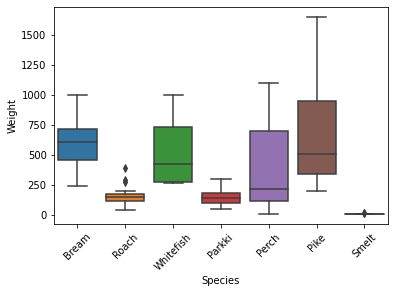

In [ ]:
grafico = sns.boxplot(x="Species",y="Weight", data=df)
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=45); 

Se puede apreciar a simple vista la clasificacion de los peces por peso, siendo el mas pesado la especie Pike y la mas liviana la especie Smelt.
Como tambien 2 ejemplares de Roach que escapan a la distribucion de su especie pesando mas de lo normal.

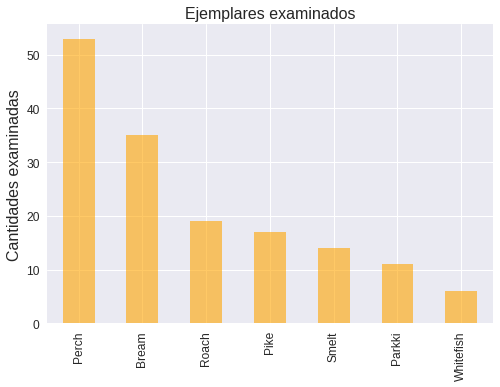

In [ ]:
df["Species"].value_counts().plot(kind="bar", fontsize=12, color ="orange", alpha=.6)
#plt.style.use("seaborn")
plt.title('Ejemplares examinados',fontsize = 16);
plt.ylabel('Cantidades examinadas',fontsize = 16);
plt.xticks(rotation = 90);

En este grafico se puede apreciar la cantidad de especies vistas como tambien cuantas de cada una fueron medidas. Siendo la mas comun o la mas clasificada la especie Perch

# Aplicacion de modelos de regresion

**Importar modelos**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## BaggingRegressor

**Instanciar modelo por defecto**

In [ ]:
bagreg = BaggingRegressor(random_state= 42)

**Ajuste de modelo en conjunto de datos procesados**

In [ ]:
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(random_state=42)

In [ ]:
bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9846823165958266
0.9587083293761065


**Optimizacion de modelo**

- Mediante un rango inicial de estimators iterables de 50, se detecta que el numero ideal de estimators es 17.

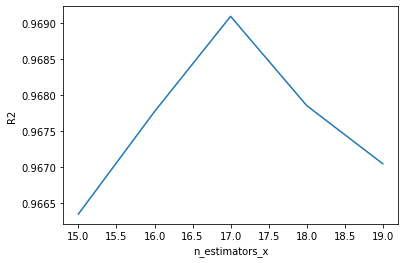

In [ ]:
# Lista de valores a probar para n_estimators:
n_estimators_1 = list(range(15, 20))
# Lista para almacenar la puntuación para cada valor de n_estimators:
r2_1 = []
for x in n_estimators_1:
    bagreg_x = BaggingRegressor(n_estimators = x, 
                             random_state = 42)
    bagreg_x.fit(X_train_processed, y_train)
    score = bagreg_x.score(X_test_processed, y_test)
    r2_1.append(score)
plt.plot(n_estimators_1, r2_1)
plt.xlabel('n_estimators_x')
plt.ylabel('R2');

**modelo optimizado**

In [ ]:
bagreg_x = BaggingRegressor(random_state = 42, n_estimators= 17)
bagreg_x.fit(X_train_processed, y_train)
bagreg_x_test_score = bagreg_x.score(X_test_processed, y_test)
print("Resultado optimizado en conjunto de prueba:", bagreg_x_test_score)

Resultado optimizado en conjunto de prueba: 0.9690942450471184


# Regresion de bosque aleatorio

**Modelo por defecto**

In [ ]:
rf = RandomForestRegressor(random_state = 42) #sin hiperparametros
rf.fit(X_train_processed, y_train) # ajuste de modelo
rf_test_score = rf.score(X_test_processed, y_test) # evaluacion de resultados
print(rf_test_score)

0.9682497425990086


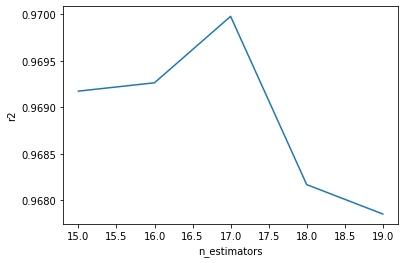

In [ ]:
# Lista de valores a probar para n_estimators:
n_estimators_2 = list(range(15, 20))
r2_estimators = []
for x in n_estimators_2:
    rf_x = RandomForestRegressor(n_estimators = x, 
                             random_state = 42)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_estimators.append(score)
plt.plot(n_estimators_2, r2_estimators)
plt.xlabel('n_estimators')
plt.ylabel('r2');

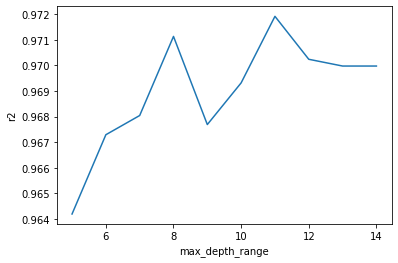

In [ ]:
# Lista de valores a probar para n_estimators:
max_depth_range = list(range(5, 15))
# Lista para almacenar la puntuación para cada valor de n_estimators:
r2_depth = []
for x in max_depth_range:
    rf_x = RandomForestRegressor(n_estimators = 17, 
                             random_state = 42,
                             max_depth=x)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_depth.append(score)
plt.plot(max_depth_range, r2_depth)
plt.xlabel('max_depth_range')
plt.ylabel('r2');

In [ ]:
rf = RandomForestRegressor(random_state = 42, n_estimators = 17 , max_depth = 11) #sin hiperparametros
rf.fit(X_train_processed, y_train) # ajuste de modelo
rf_test_score = rf.score(X_test_processed, y_test) # evaluacion de resultados
print(rf_test_score)

0.9719222463972533


##**Luego de modelar tanto random forest como bagging regressor y optimizar sus resultados. Se recomienda utilizar el modelo RandomForestRegressor el cual dio el mejor resultado R^2**

RandomForest: 0.9719222463972533

BaggingRegressor: 0.9690942450471184